In [365]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
import scipy
import warnings
warnings.filterwarnings('ignore')

In [54]:
dfo1run1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O1/delays-from-all-runs/Cement_sand_O1_Run1.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run2 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O1/delays-from-all-runs/Cement_sand_O1_Run2.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run3 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O1/delays-from-all-runs/Cement_sand_O1_Run3.txt', delimiter=' '
                       , dtype= np.float64)

In [55]:
dfO1 = pd.concat([dfo1run1['Delays'], dfo1run1['Time-delay1'], dfo1run2['Time-delay2'], dfo1run3['Time-delay3']], axis=1)

In [56]:
dfO1 = dfO1.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3"}, errors="raise")

In [57]:
dfo2run1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run1.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run2 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run2.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run3 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run3.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run4 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run4.txt', delimiter=' '
                       , dtype= np.float64)

In [58]:
dfO2 = pd.concat([dfo2run1['Delays'], dfo2run1['Time-delay1'], dfo2run2['Time-delay2'], dfo2run3['Time-delay3'], 
                 dfo2run4['Time-delay4']], axis=1)

In [59]:
dfO2 = dfO2.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                     "Time-delay4": "Run4"}, errors="raise")

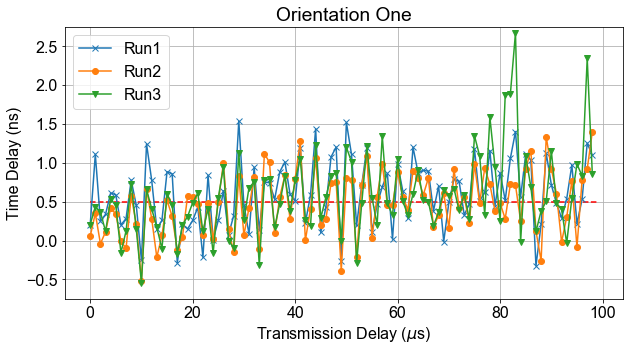

In [85]:
plt.figure(figsize=(10,5))
[plt.plot(dfO1['Delays'], dfO1[r], p, label = str(r)) for r, p in zip(dfO1.keys()[1:], ['-x', '-o', '-v'])]
plt.grid()
plt.xlabel('Transmission Delay ($\mu$s)')
plt.ylabel('Time Delay (ns)')
plt.legend()
plt.title('Orientation One')
plt.ylim(-0.75, 2.75)
plt.hlines(0.5, 0, 99, color = 'r', linestyles='--')
plt.show()

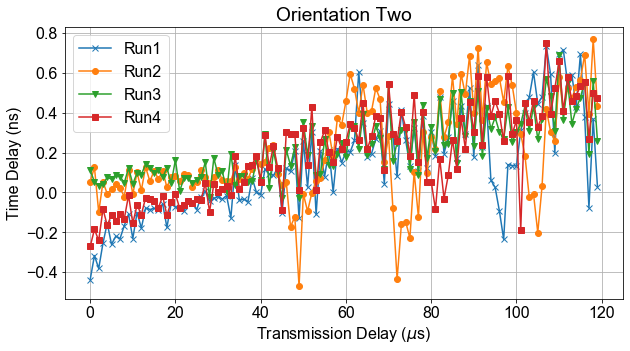

In [170]:
plt.figure(figsize=(10,5))
[plt.plot(dfO2['Delays'], dfO2[r], p, label=str(r)) for r, p in zip(dfO2.keys()[1:], ['-x', '-o', '-v', '-s'])]
plt.grid()
plt.xlabel('Transmission Delay ($\mu$s)')
plt.ylabel('Time Delay (ns)')
plt.legend()
plt.title('Orientation Two')
# plt.ylim(-0.75, 2.75)
plt.show()

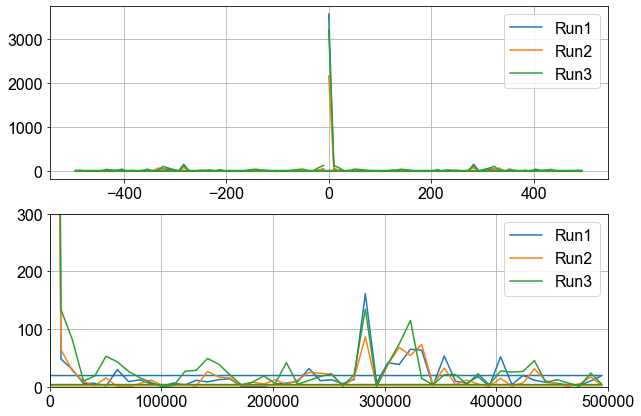

In [124]:
fig, ax  = plt.subplots(2, 1, figsize=(10, 7))
[ax[0].plot(f/1000, p, label=str(r)) for f, p, r in zip(freq_O1, powers_O1, dfO1.keys()[1:])]
ax[0].legend()
ax[0].grid()
[ax[1].plot(f, p, label=str(r)) for f, p, r in zip(freq_O1, powers_O1, dfO1.keys()[1:])]
ax[1].legend()
ax[1].grid()
ax[1].set_ylim(0, 300)
ax[1].set_xlim(0, 500000)
plt.show()

(0, 300)

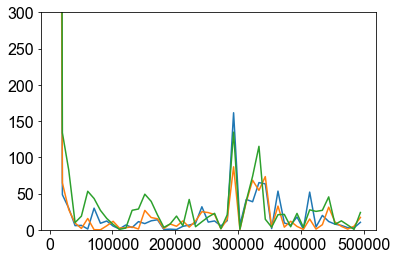

In [166]:
pos_masks_O1 = [np.where(f > 0) for f in freq_O1]
freqs_O1 = [f[pos_mask] for f, pos_mask in zip(freq_O1, pos_masks_O1)]
peak_freqs_O1 = [freqs[power[post_mask].argmax()] for freqs, power, post_mask in zip(freqs_O1, powers_O1, pos_masks_O1)]

# np.allclose(peak_freq, 1./period)

# # An inner plot to show the peak frequency
# axes = plt.axes([0.55, 0.3, 0.3, 0.5])
# plt.title('Peak frequency')
[plt.plot(freqs[:49], power[:49]) for freqs, power in zip(freqs_O1, powers_O1)] 
plt.ylim(0,300)

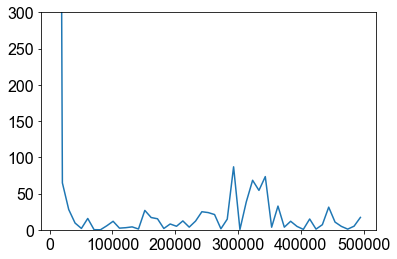

In [371]:
plt.plot(freqs_O1[1][:49], powers_O1[1][:49])
plt.ylim(0,300)
plt.show()

In [273]:
def notch(f, fft, freqs):
    fft_fil = fft.copy()
    fft_fil[np.abs(freqs) > f] = 0
    fft_fil[np.abs(freqs) < f] = 0
    filtered_sig = fftpack.ifft(fft_fil)
    return filtered_sig

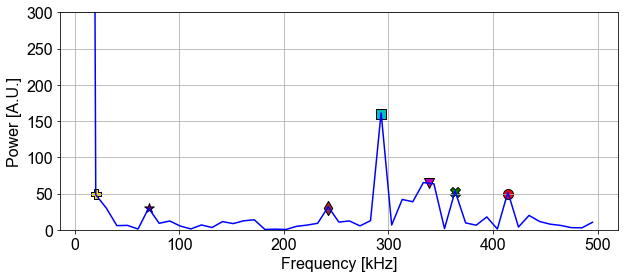

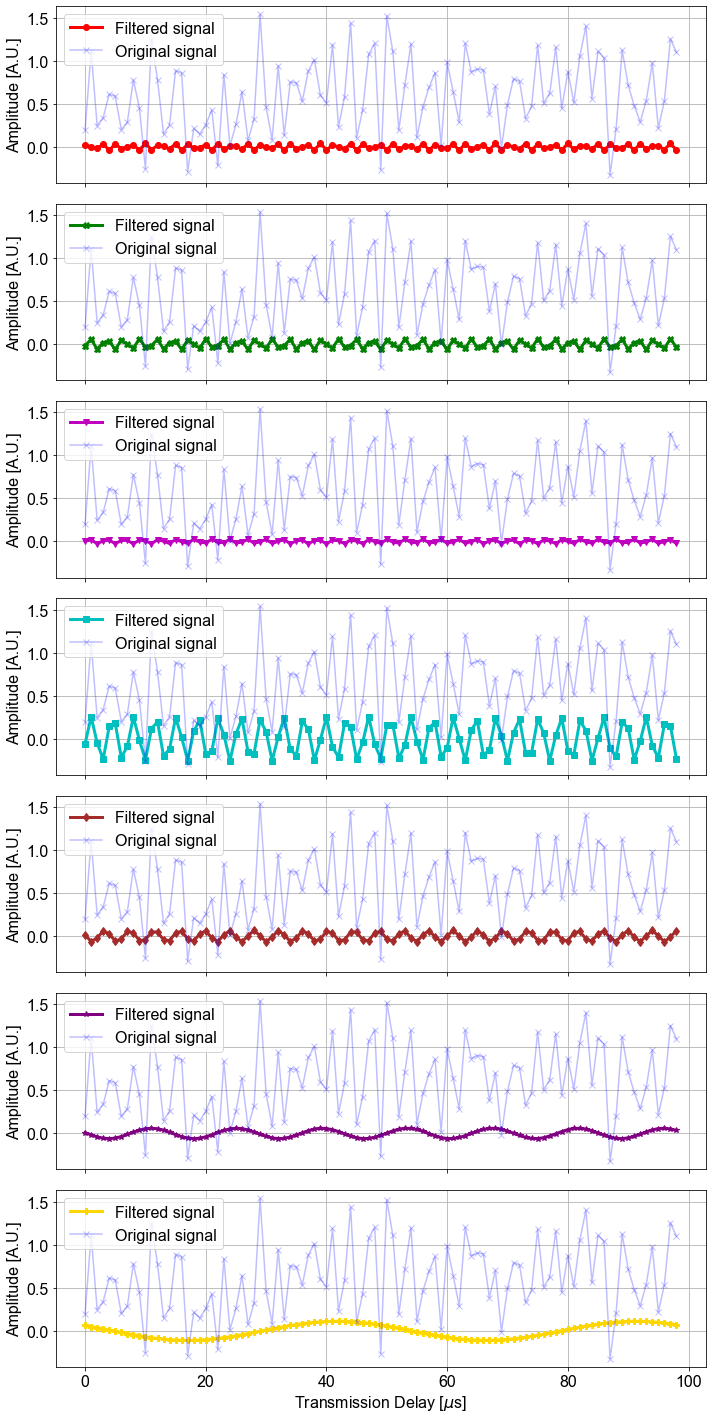

In [370]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O1[0][:49]/1000, powers_O1[0][:49], color = 'b')
ax.set_ylim(0, 300)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [414141.4141414142, 363636.3636363637, 339000, 292500, 242500, 70707.07070707071, 20202.020202020205]
freqs_to_filter = [414141.4141414142, 363636.3636363637, 343434.34343434346, 
                   peak_freqs_O1[0], 242424.24242424246, 70707.07070707071, 
                   20202.020202020205]
powers_to_scat = [50, 52, 65, 160, 30, 30, 50]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO1['Delays'], notch(f, ffts_O1[0], freq_O1[0]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO1['Delays'], dfO1['Run1'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

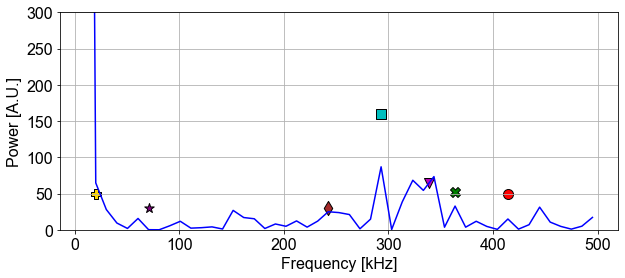

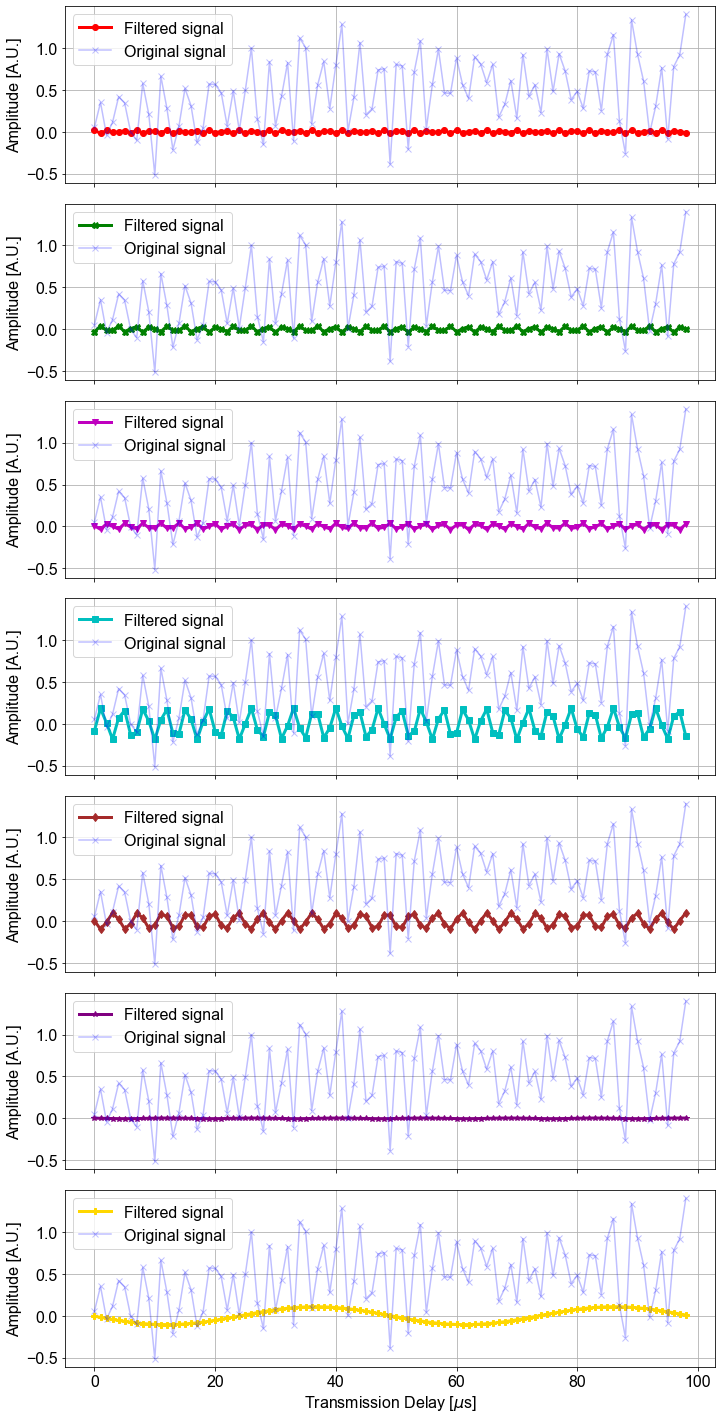

In [372]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O1[1][:49]/1000, powers_O1[1][:49], color = 'b')
ax.set_ylim(0, 300)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [414141.4141414142, 363636.3636363637, 339000, 292500, 242500, 70707.07070707071, 20202.020202020205]
freqs_to_filter = [414141.4141414142, 363636.3636363637, 343434.34343434346, 
                   peak_freqs_O1[0], 242424.24242424246, 70707.07070707071, 
                   20202.020202020205]
powers_to_scat = [50, 52, 65, 160, 30, 30, 50]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO1['Delays'], notch(f, ffts_O1[1], freq_O1[1]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO1['Delays'], dfO1['Run2'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

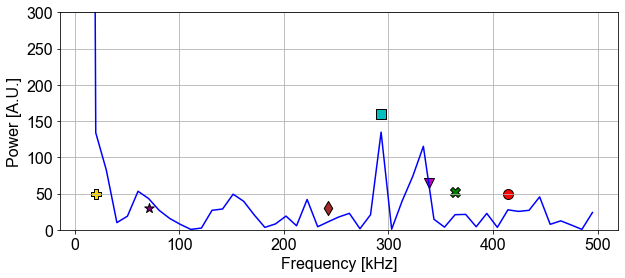

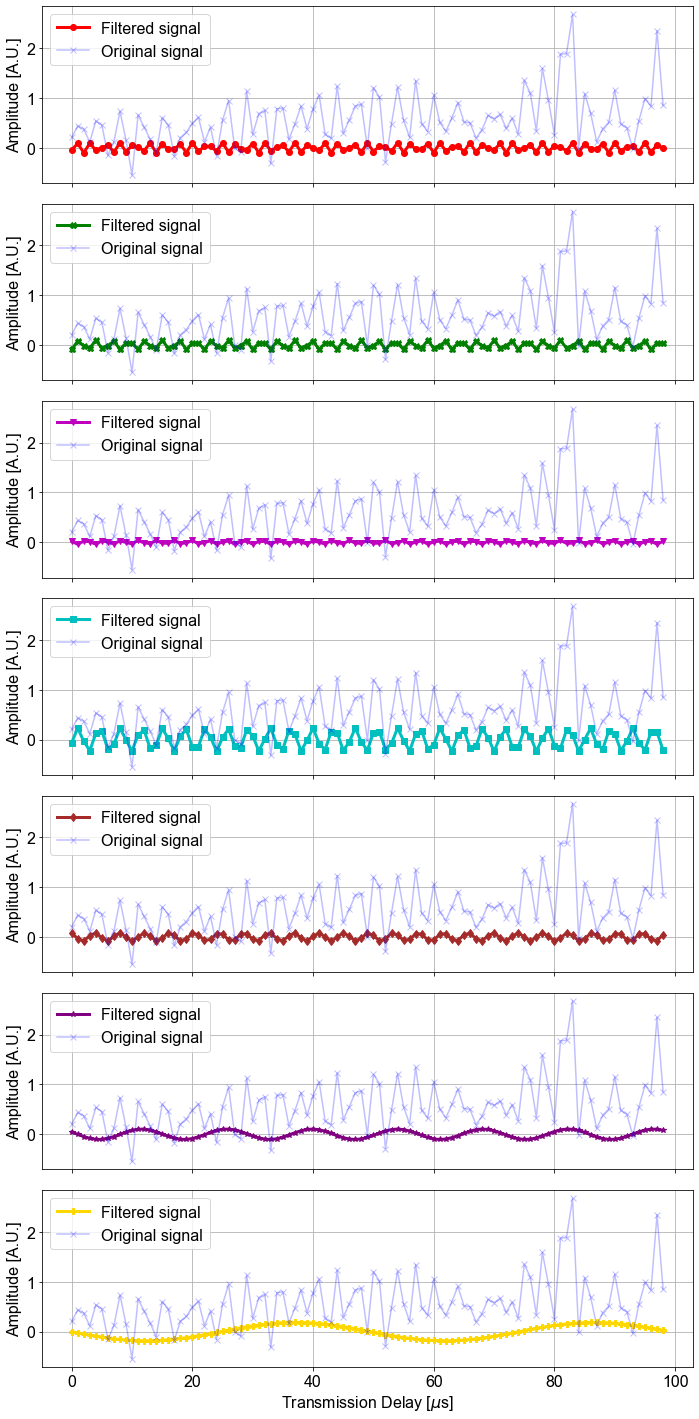

In [373]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O1[2][:49]/1000, powers_O1[2][:49], color = 'b')
ax.set_ylim(0, 300)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [414141.4141414142, 363636.3636363637, 339000, 292500, 242500, 70707.07070707071, 20202.020202020205]
freqs_to_filter = [414141.4141414142, 363636.3636363637, 343434.34343434346, 
                   peak_freqs_O1[0], 242424.24242424246, 70707.07070707071, 
                   20202.020202020205]
powers_to_scat = [50, 52, 65, 160, 30, 30, 50]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO1['Delays'], notch(f, ffts_O1[2], freq_O1[2]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO1['Delays'], dfO1['Run3'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()